# **VPG with Exploration**

# Import Libraries

In [2]:
import os
import sys
import random
import numpy as np
import pandas as pd
from enum import Enum

import gym
from gym import spaces
import time

from PyQt5.QtWidgets import (QApplication, QMainWindow, QWidget, QVBoxLayout, QLabel, QFrame)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPainter, QColor, QFont, QBrush, QPen, QIcon

import torch
from torch import nn
import tensorflow as tf
import torch.optim as optim
import torch.nn.functional as F
from tensorflow.keras import layers, optimizers, losses

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go



In [3]:
from treasure_env import *
from VanillaPolicyGradient import *

# Saving and Loading

* Model Saving

In [ ]:
def save_model(agent, file_path, extra_logs=None, hyperparams=None):
    checkpoint = {
        'model_state_dict': agent.policy.state_dict(),       # Neural network weights
        'optimizer_state_dict': agent.optimizer.state_dict(), # Optimizer state
        'epsilon': agent.epsilon,                             # Current epsilon value
        'losses': agent.losses,                               # List of policy losses
        'log_probs': agent.log_probs,                         # Log probs
        'rewards': agent.rewards,                             # Rewards of current episode
        'gamma': agent.gamma,                                 # Discount factor
        'grad_clip': agent.grad_clip,                         # Gradient clipping value
        'batch_size': agent.batch_size,                       # Batch size
        'epsilon_min': agent.epsilon_min,                     # Epsilon minimum value
        'epsilon_decay': agent.epsilon_decay,                 # Epsilon decay percentage 
    }

    # save external logs or hyperparameters
    if extra_logs:
        checkpoint['logs'] = extra_logs
    if hyperparams:
        checkpoint['hyperparameters'] = hyperparams

    torch.save(checkpoint, file_path)
    print(f"Model and training state saved to {file_path}")

* Model Loading

In [ ]:
def load_model(agent, file_path):
    checkpoint = torch.load(file_path)
    agent.policy.load_state_dict(checkpoint['model_state_dict'])
    agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    agent.epsilon = checkpoint['epsilon']
    agent.logs = checkpoint['logs']
    agent.losses = checkpoint.get('losses', [])
    agent.log_probs = checkpoint.get('log_probs', [])
    agent.rewards = checkpoint.get('rewards', [])
    agent.gamma = checkpoint.get('gamma', 0.95)
    agent.grad_clip = checkpoint.get('grad_clip', 0.5)
    agent.batch_size = checkpoint.get('batch_size', 8)
    agent.epsilon_min = checkpoint.get('epsilon_min', 0.1)
    agent.epsilon_decay = checkpoint.get('epsilon_decay', 0.999)

    print(f"Model and training state loaded from {file_path}")

* Logs Saving

In [6]:
def save_logs(logs,reward_per_step_logs,ver):
    df_logs = pd.DataFrame(logs)
    df_logs.to_csv(f"../Tensorboard logs/vpg_logs/vpg_training_logs_{ver}.csv", index=False)
    
    df_reward_per_step_logs = pd.DataFrame(reward_per_step_logs)
    df_reward_per_step_logs.to_csv(f"../Tensorboard logs/vpg_logs/vpg_training_reward_per_step_logs_{ver}.csv", index=False)
    
    print(f"Logs are save at ../Tensorboard logs/vpg_logs/vpg_training_logs_{ver}.csv , ../Tensorboard logs/vpg_logs/vpg_training_reward_per_step_logs_{ver}.csv")

* Logs Loading

In [7]:
def load_logs(name):
    df=pd.read_csv(f"../Tensorboard logs/vpg_logs/{name}.csv")
    return df

# Policy Network with Exploration

* Training

In [20]:
if __name__ == "__main__":

    grid_dim = 9  # Grid size
    max_steps = 500  # Max steps before episode ends
    lives = 3  # Number of lives agent has
    action_dim = 4  # UP, DOWN, LEFT, RIGHT
    feature_dim = 5
    env =TreasureHuntEnv(size=grid_dim, max_steps=max_steps, lives=lives)

    learning_rate=0.0003
    gamma=0.95
    hidden_size=8
    batch_size=8
    grad_clip=0.5
    epsilon_start=1.0
    epsilon_min=0.1
    epsilon_decay=0.999
    agent = PolicyGradientAgent(grid_dim=grid_dim,
                                feature_dim=feature_dim,
                                action_dim=action_dim,
                                learning_rate=learning_rate,
                                gamma=gamma,
                                hidden_size=hidden_size,
                                batch_size=batch_size,
                                grad_clip=grad_clip,
                                epsilon_start=epsilon_start,
                                epsilon_min=epsilon_min,
                                epsilon_decay=epsilon_decay
                               )
    
    num_episodes=10000
    log_every=2
    logs,reward_per_step_logs = agent.learn(env, 
                       num_episodes=num_episodes,
                       log_every=log_every,
                       size=grid_dim, 
                       max_steps=max_steps,
                       lives=lives
                                           )

Episode 0, Reward: -48, Loss: 0, Epsilon: 0.999
Episode 2, Reward: -17, Loss: 0, Epsilon: 0.997
Episode 4, Reward: 34, Loss: 0, Epsilon: 0.995
Episode 6, Reward: -550, Loss: 0, Epsilon: 0.993
Episode 8, Reward: -884, Loss: -3.5812039375305176, Epsilon: 0.991
Episode 10, Reward: -112, Loss: -3.5812039375305176, Epsilon: 0.989
Episode 12, Reward: -90, Loss: -3.5812039375305176, Epsilon: 0.987
Episode 14, Reward: -62, Loss: -3.5812039375305176, Epsilon: 0.985
Episode 16, Reward: -1344, Loss: -2.454019069671631, Epsilon: 0.983
Episode 18, Reward: -240, Loss: -2.454019069671631, Epsilon: 0.981
Episode 20, Reward: -720, Loss: -2.454019069671631, Epsilon: 0.979
Episode 22, Reward: -704, Loss: -2.454019069671631, Epsilon: 0.977
Episode 24, Reward: -9, Loss: -4.5938944816589355, Epsilon: 0.975
Episode 26, Reward: -298, Loss: -4.5938944816589355, Epsilon: 0.973
Episode 28, Reward: -695, Loss: -4.5938944816589355, Epsilon: 0.971
Episode 30, Reward: -494, Loss: -4.5938944816589355, Epsilon: 0.969


* Save Results

In [ ]:
save_logs(logs,reward_per_step_logs,1)

In [ ]:
save_model(agent,"../Models/VPG/vpg_with_epsilon_1.pth",extra_logs={
        'logs': logs,
        'reward_per_step_logs': reward_per_step_logs
    })

Model and training state saved to ../Models/VPG/vpg_with_epsilon_1.pth


* Visualize Results:
  Loss - Cumulative Rewards - Episode Length

In [23]:
df_logs=load_logs("vpg_training_logs_1")

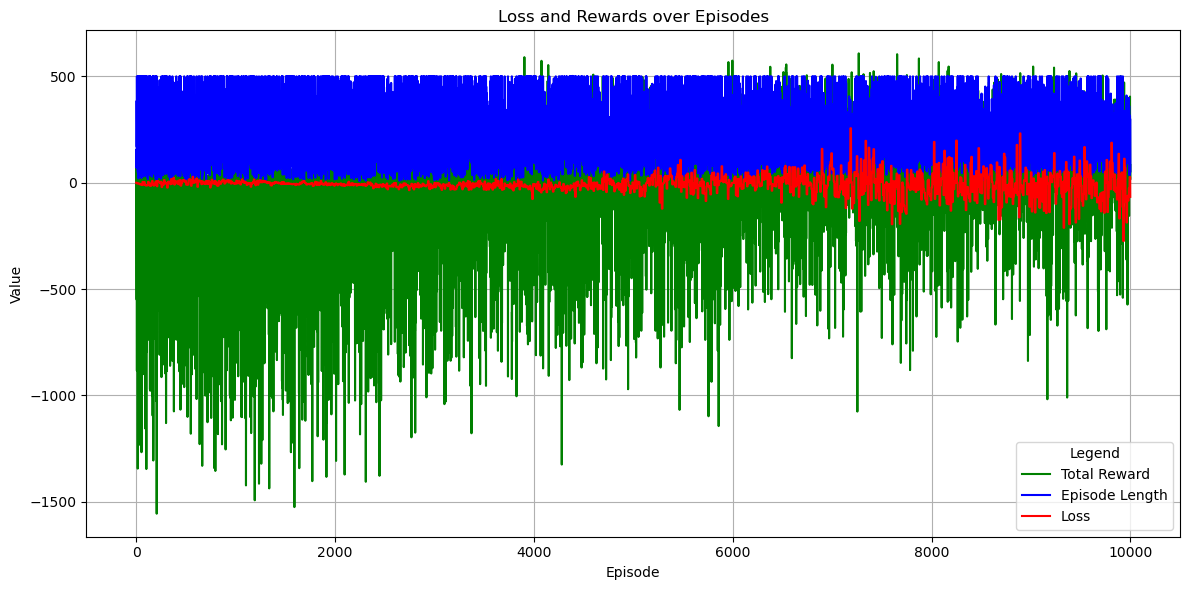

In [26]:
plt.figure(figsize=(12, 6))

# Loss

# Total Reward
plt.plot(df_logs.index, df_logs['total_reward'], label='Total Reward', color='green')

# Episode Length
plt.plot(df_logs.index, df_logs['episode_length'], label='Episode Length', color='blue')

plt.plot(df_logs.index, df_logs['loss'], label='Loss', color='red')

plt.title("Loss and Rewards over Episodes")
plt.xlabel("Episode")
plt.ylabel("Value")
plt.legend(title="Legend")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

* Testing

In [ ]:
test_env = TreasureHuntEnv(size=grid_dim, max_steps=max_steps, lives=lives,render_mode="human")
agent2 = PolicyGradientAgent(grid_dim=grid_dim,
                                feature_dim=feature_dim,
                                action_dim=action_dim,
                                learning_rate=learning_rate,
                                gamma=gamma,
                                hidden_size=hidden_size,
                                batch_size=batch_size,
                                grad_clip=grad_clip,
                                epsilon_start=epsilon_start,
                                epsilon_min=epsilon_min,
                                epsilon_decay=epsilon_decay
                               )
load_model(agent2, "../Models/VPG/vpg_with_epsilon_1.pth")

agent2.policy.eval()  # Set to eval mode for inference

obs = test_env.reset()[0]
grid, features = process_observation(obs, size=9, max_steps=1000, lives=3)

done = False
total_reward = 0
while not done:
    action = agent2.select_action((grid, features))
    obs, reward, done, _, _ = test_env.step(action)
    grid, features = process_observation(obs, size=9, max_steps=1000, lives=3)
    total_reward += reward
    test_env.render()
    time.sleep(0.3)
env.close()
print(f"Total reward from loaded agent: {total_reward}")

Model and training state loaded from ../Models/VPG/vpg_with_epsilon_1.pth
Total reward from loaded agent: 79


: 